Задание
<p>Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.</p>

Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты
<p></p>
<p>Требуется выполнить следующее задание:

## Задание 1. Загрузите файл HR.csv в pandas dataframe

### Загружаем модули

In [3]:
import pandas as pd
import seaborn as sns

### Загружаем файл HR.csv в pandas dataframe

In [4]:
df_HR = pd.read_csv('HR.csv')

## Задание 2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

### 2.1. Определяем среднее,медиана,мин/макс,сред.отклонение

In [5]:
df_HR.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### 2.2. Определяем моды

In [6]:
df_HR.mode() # мода

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


## Задание 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

### определяем колличественные переменные

In [42]:
cols = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

### рассчитываем корреляционную матрицу

In [43]:
corrmat = df_HR[cols].corr()

### визуализируем корреляционную матрицу

<AxesSubplot:>

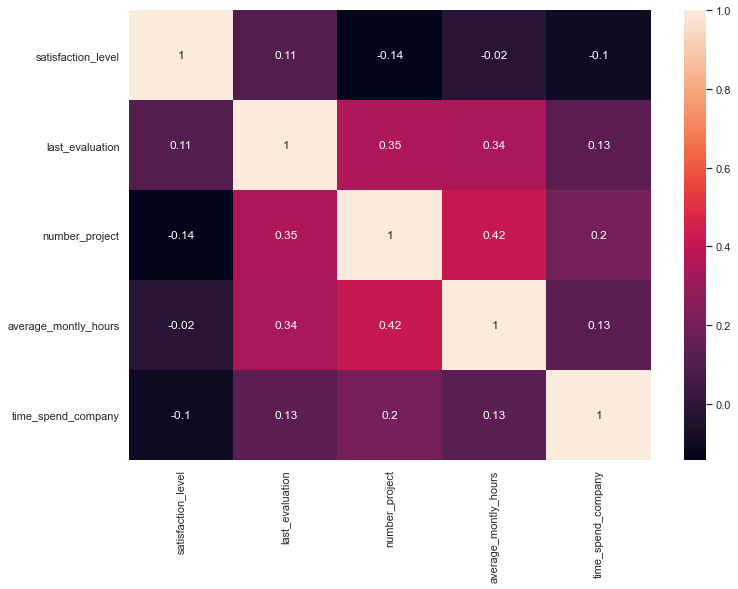

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corrmat, annot=True)

### Определяем первые самые скоррелированные переменные

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='last_evaluation', ylabel='average_montly_hours'>

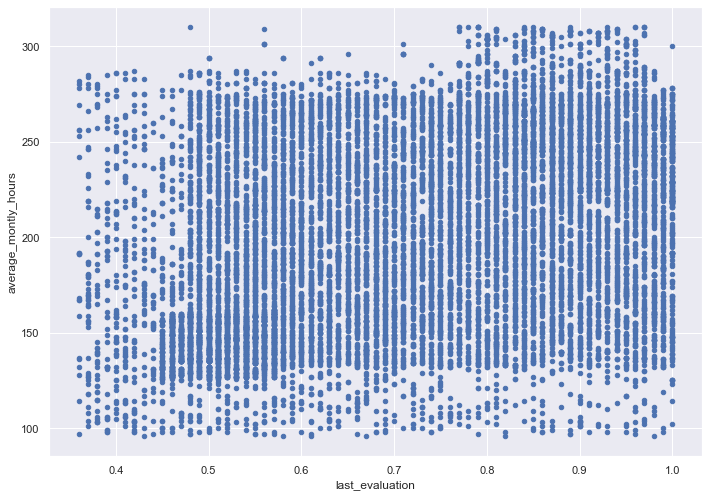

In [45]:
df_HR.plot(kind='scatter', x='last_evaluation', y='average_montly_hours')

### В общей массе данные "размазаны", поэтому будем изучать только работающих

#### создаем датафрейм только для работающих

In [58]:
power = df_HR[df_HR['left'].isin([1])] # ДатаФрейм только для работающих

### рассчитываем корреляционную матрицу только для работающих¶

In [59]:
corrmat_power = power[cols].corr()

### визуализируем корреляционную матрицу только для работающих¶

<AxesSubplot:>

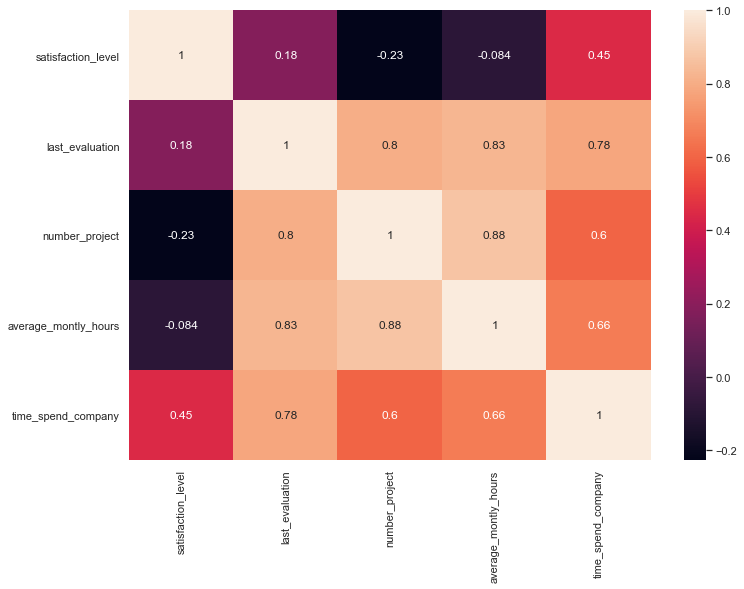

In [60]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corrmat_power, annot=True)

### Определите две самые скоррелированные и две наименее скоррелированные переменные

#### первые самые скоррелированные переменные last_evaluation и average_montly_hours

In [61]:
power[['last_evaluation', 'average_montly_hours']].corr()

,last_evaluation,average_montly_hours
last_evaluation,1.000000,0.830336
average_montly_hours,0.830336,1.000000


#### визуализируем

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='last_evaluation', ylabel='average_montly_hours'>

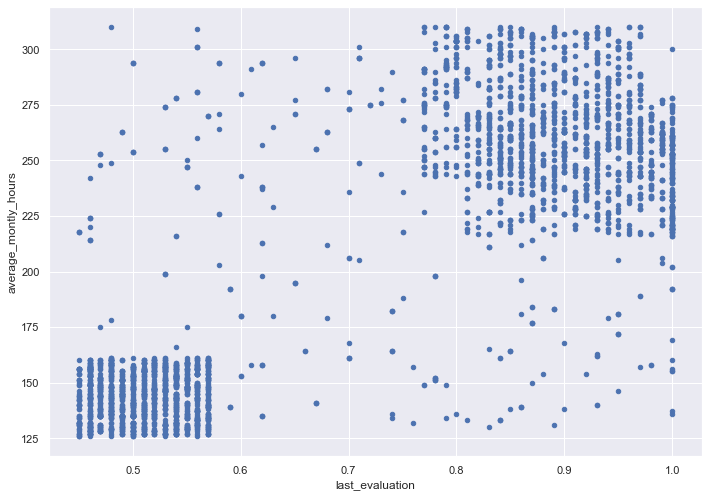

In [62]:
power.plot(kind='scatter', x='last_evaluation', y='average_montly_hours')

#### вторые самые скоррелированные переменные last_evaluation и time_spend_company

In [63]:
power[['last_evaluation', 'time_spend_company']].corr()

,last_evaluation,time_spend_company
last_evaluation,1.000000,0.783873
time_spend_company,0.783873,1.000000


#### визуализируем

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='last_evaluation', ylabel='time_spend_company'>

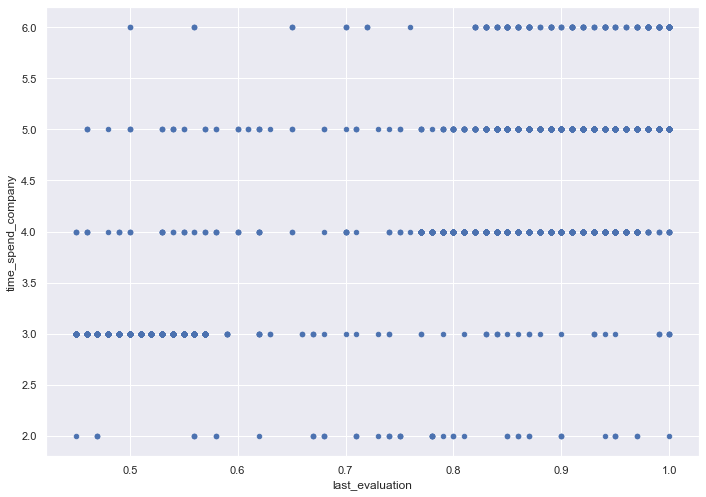

In [64]:
power.plot(kind='scatter', x='last_evaluation', y='time_spend_company')

#### первые наименее скоррелированные переменные

In [65]:
power[['satisfaction_level', 'average_montly_hours']].corr()

,satisfaction_level,average_montly_hours
satisfaction_level,1.000000,-0.084117
average_montly_hours,-0.084117,1.000000


#### визуализируем

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='satisfaction_level', ylabel='average_montly_hours'>

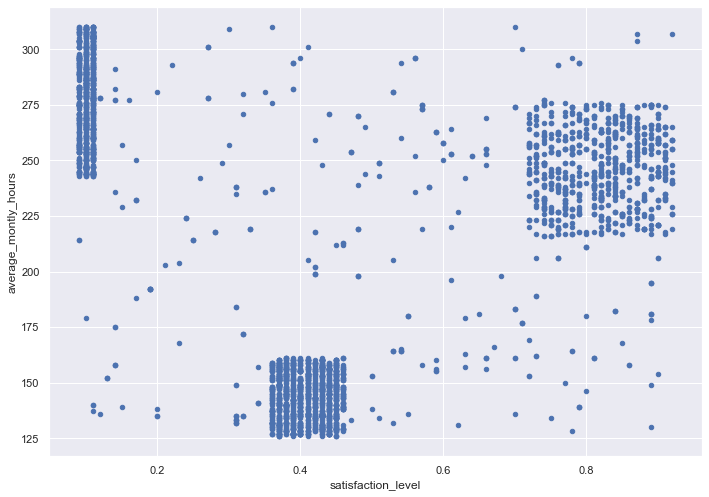

In [66]:
power.plot(kind='scatter', x='satisfaction_level', y='average_montly_hours')

#### вторые наименее скоррелированные переменные

In [67]:
power[['satisfaction_level', 'last_evaluation']].corr()

,satisfaction_level,last_evaluation
satisfaction_level,1.000000,0.182295
last_evaluation,0.182295,1.000000


#### визуализируем

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='satisfaction_level', ylabel='last_evaluation'>

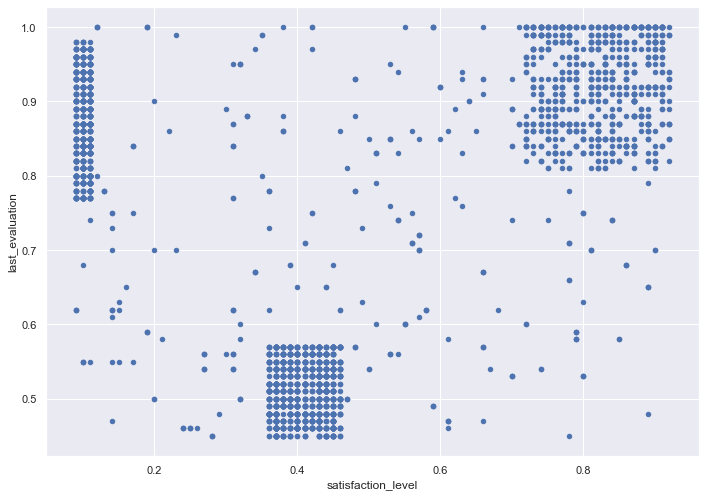

In [68]:
power.plot(kind='scatter', x='satisfaction_level', y='last_evaluation')

## Задание 4. Рассчитайте сколько сотрудников работает в каждом департаменте.

#### создаем датафрейм только для работающих

In [57]:
power = df_HR[df_HR['left'].isin([1])]

#### Рассчитываем сколько сотрудников работает в каждом департаменте при помощи сводной таблицы

In [71]:
power.pivot_table(index='department', values = 'left', aggfunc = 'count')

,left
department,
IT,273
RandD,121
accounting,204
hr,215
management,91
marketing,203
product_mng,198
sales,1014
support,555


#### Рассчитываем сколько сотрудников работает в каждом департаменте при помощи value_counts

In [72]:
power['department'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: department, dtype: int64

## Задание 5. Показать распределение сотрудников по зарплатам. 

#### Показываем распределение сотрудников по зарплатам при помощи value_counts

In [73]:
df_HR['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

#### Показываем распределение сотрудников по зарплатам при помощи сводной таблицы

In [74]:
df_HR.pivot_table(index='salary', values = 'left', aggfunc = 'count')

,left
salary,
high,1237
low,7316
medium,6446


#### Показываем распределение сотрудников по зарплатам при помощи сводной таблицы для работающих

In [75]:
power.pivot_table(index='salary', values = 'left', aggfunc = 'count')
# среди работающих: высокий уровень зарплаты получают мало, в основном - это низкий уровень

,left
salary,
high,82
low,2172
medium,1317


#### Показываем распределение сотрудников по зарплатам при помощи сводной таблицы для уволенных

In [76]:
df_HR[df_HR['left'].isin([0])].pivot_table(index='salary', values = 'left', aggfunc = 'count')

,left
salary,
high,1155
low,5144
medium,5129


#### можно сделать вывод, что большенство сотрудников с высоким и средний уровнем ЗП уволились

## Задание 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [169]:
pd.crosstab(df_HR['department'], df_HR['salary'], values = df_HR['left'], aggfunc='count')

salary,high,low,medium
department,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


# Задание 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [77]:
def info(count, med, mean):
    """ Функция для вывода информации"""
    print()
    print('Количество сотрудников - ', count)
    print('Медиана количества часов на рабочем месте в месяц - ', med)
    print('Среднее количество часов на рабочем месте в месяц - ', mean)
    print()

In [78]:
# расчет медианы для времени на работе для сотрудников с высокой ЗП
high = df_HR[df_HR['salary'].isin(['high'])]['average_montly_hours'].median()
# расчет средней для времени на работе для сотрудников с высокой ЗП
high_mean = df_HR[df_HR['salary'].isin(['high'])]['average_montly_hours'].mean()
# количество сотрудников с высокой ЗП
high_count = df_HR[df_HR['salary'].isin(['high'])]['average_montly_hours'].count()

# расчет медианы для времени на работе для сотрудников с низкой ЗП
low = df_HR[df_HR['salary'].isin(['low'])]['average_montly_hours'].median()
# расчет средней для времени на работе для сотрудников с низкой ЗП
low_mean = df_HR[df_HR['salary'].isin(['low'])]['average_montly_hours'].mean()
# количество сотрудников с низкой ЗП
low_count = df_HR[df_HR['salary'].isin(['low'])]['average_montly_hours'].count()

if high > low: # проверка условия на кто больше проводит времени на работе
    print('Гипотеза, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом верна')
else:
    print('Гипотеза, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом не верна')

print('Разница - ', high - low) # вывод разницы 
print()
print('Данные по сотрудникам с выским уровнем ЗП:')
info(high_count, high, high_mean)          
print('Данные по сотрудникам с низким уровнем ЗП:')
info(low_count, low, low_mean)

Гипотеза, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом не верна
Разница -  0.0

Данные по сотрудникам с выским уровнем ЗП:

Количество сотрудников -  1237
Медиана количества часов на рабочем месте в месяц -  199.0
Среднее количество часов на рабочем месте в месяц -  199.86742118027485

Данные по сотрудникам с низким уровнем ЗП:

Количество сотрудников -  7316
Медиана количества часов на рабочем месте в месяц -  199.0
Среднее количество часов на рабочем месте в месяц -  200.9965828321487



#### Вывод: сотрудники с низкой ЗП проводят на работе столько же времени, сколько же и сотрудники с высокой ЗП

## Задание 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
    
    - Доля сотрудников с повышением за последние 5 лет
    - Средняя степень удовлетворенности
    - Среднее количество проектов

In [79]:
def summary(df):
    """Функция для расчета:
        Кол-во сотрудников, Кол-во сотрудников с повышением за последние 5 лет, 
        Доля сотрудников с повышением за последние 5 лет, Средняя степень удовлетворенности, 
        Среднее количество проектов.
        Данная функция предназначена только для данной задачи."""
    result = {
        'Кол-во сотрудников': df['satisfaction_level'].count(),
        'Кол-во сотрудников с повышением за последние 5 лет': df['promotion_last_5years'].sum(),
        'Доля сотрудников с повышением за последние 5 лет': df['promotion_last_5years'].sum() / df['satisfaction_level'].count(),
        'Средняя степень удовлетворенности': df['satisfaction_level'].mean(),
        'Среднее количество проектов': df['number_project'].mean()
    }
    return pd.Series(result)

In [80]:
df_HR.groupby('left').apply(summary)

,Кол-во сотрудников,Кол-во сотрудников с повышением за последние 5 лет,Доля сотрудников с повышением за последние 5 лет,Средняя степень удовлетворенности,Среднее количество проектов
left,,,,,
0,11428.0,300.0,0.026251,0.666810,3.786664
1,3571.0,19.0,0.005321,0.440098,3.855503


#### Выводы:
1. Основные сотрудники, которые повышались, уволились
2. Сотрудники, которые уволились, в основном были удовлетворены работой
3. Сотрудники, которые продолжают работать, сделали в среднем больше проектов, чем уволенные

## Задание 9. Разделить данные на тестовую и обучающую выборки Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки

In [299]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # импортируем LDA-функционал
from sklearn.model_selection import train_test_split

In [300]:
X = df_HR[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 
           'time_spend_company', 'Work_accident', 'promotion_last_5years']]
y = df_HR['left']

In [301]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [303]:
lda = LinearDiscriminantAnalysis() # создается LDA регрессия, создается класс
lda.fit(X_train, y_train)  # обучаем модель
lda.predict(X_test) # делаем прогноз на тестовой выборке

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [306]:
# расчет точности
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7515555555555555

In [307]:
lda.coef_ # коэффициенты дискриминатных линий

array([[-4.55977013e+00,  6.80385806e-01, -2.33732838e-01,
         4.34638008e-03,  2.43495608e-01, -1.09003687e+00,
        -1.28180496e+00]])

In [310]:
y_pred = lda.predict(X_test)
res_df = X_test.copy() # сравним наши прогнозы с фактом
res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,y_pred,y_test
972,0.11,0.74,6,290,5,0,0,1,1
4742,0.50,0.74,4,165,2,1,0,0,0
1111,0.44,0.46,2,149,3,0,0,0,1
12736,0.81,0.91,4,229,5,0,0,0,1
12593,0.37,0.54,2,132,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...
12870,0.92,0.68,5,177,4,0,0,0,0
2478,0.48,0.84,4,228,3,0,0,0,0
1145,0.37,0.49,2,153,3,0,0,0,1
5672,0.77,0.80,4,167,3,0,0,0,0


#### Точность данной модели составляет 75%.

## Задание 10. Загрузить jupyter notebook с решение на github и прислать ссылку